In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns
import numpy as np

In [37]:
data = pd.read_csv('farms_train.csv', delimiter=';', decimal=',')

data = data.dropna()

X = data.drop(columns=['DIFF'])
y = data['DIFF']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_classifier = SVC(kernel='linear',probability=True, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='recall')
f1_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='f1')


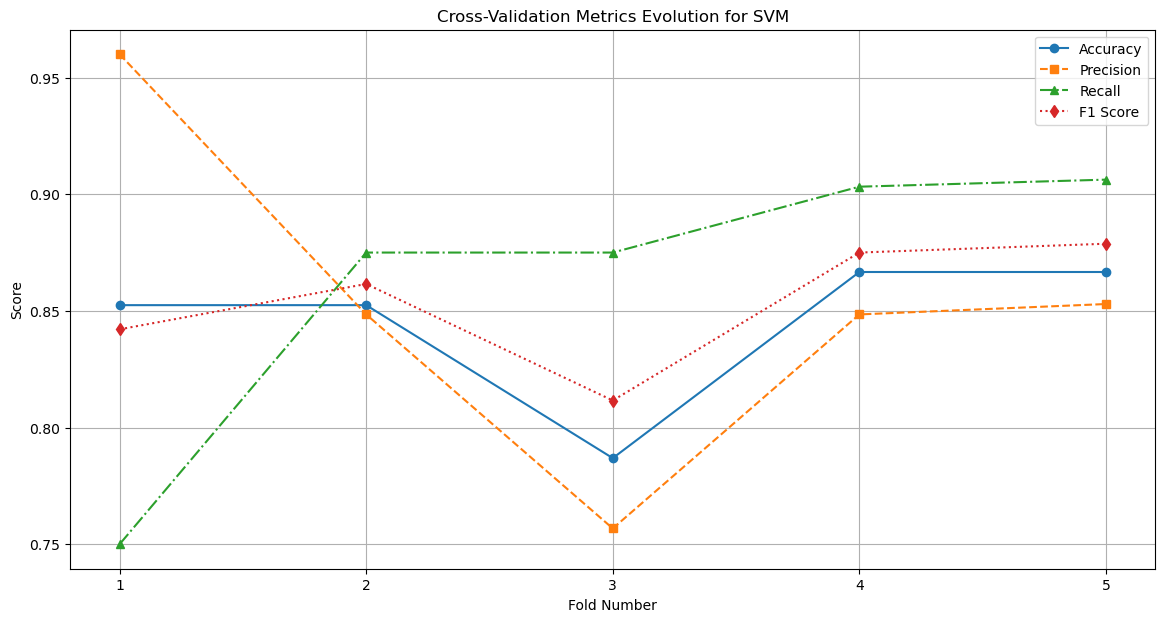

Mean Accuracy: 0.85
Mean Precision: 0.85
Mean Recall: 0.86
Mean F1 Score: 0.85


In [38]:
plt.figure(figsize=(14, 7))
plt.plot(range(1, 6), accuracy_scores, marker='o', label='Accuracy', linestyle='-')
plt.plot(range(1, 6), precision_scores, marker='s', label='Precision', linestyle='--')
plt.plot(range(1, 6), recall_scores, marker='^', label='Recall', linestyle='-.')
plt.plot(range(1, 6), f1_scores, marker='d', label='F1 Score', linestyle=':')

plt.title('Cross-Validation Metrics Evolution for SVM')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

print(f'Mean Accuracy: {np.mean(accuracy_scores):.2f}')
print(f'Mean Precision: {np.mean(precision_scores):.2f}')
print(f'Mean Recall: {np.mean(recall_scores):.2f}')
print(f'Mean F1 Score: {np.mean(f1_scores):.2f}')

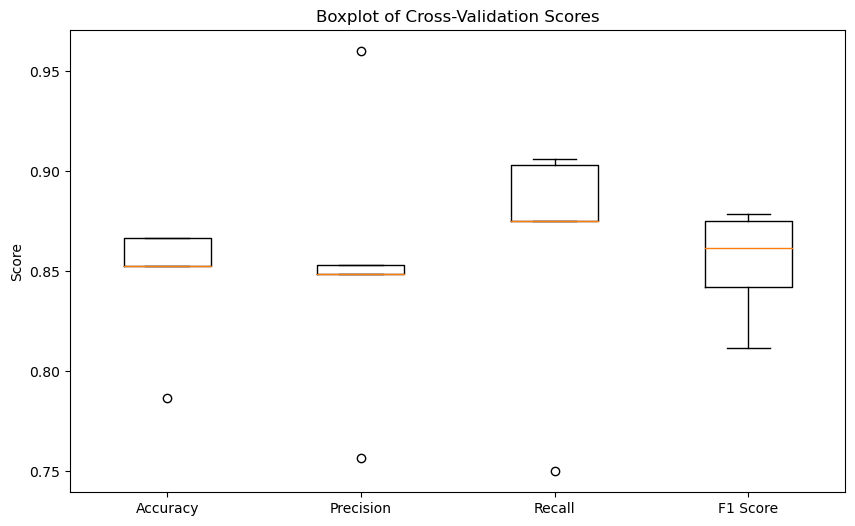

In [39]:
# Boxplot des scores
plt.figure(figsize=(10, 6))
plt.boxplot([accuracy_scores, precision_scores, recall_scores, f1_scores], labels=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
plt.title('Boxplot of Cross-Validation Scores')
plt.ylabel('Score')
plt.show()

In [40]:
# Tracer la courbe ROC moyenne
# Tracer la courbe ROC moyenne
y_pred_proba = cross_val_predict(svm_classifier, X_scaled, y, cv=cv, method='predict_proba')
fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

<Figure size 1000x600 with 0 Axes>

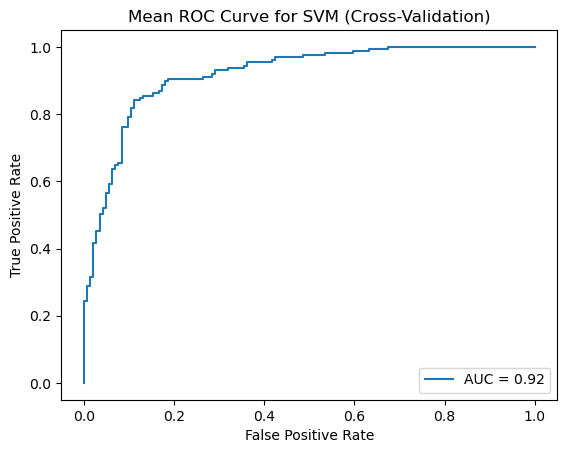

In [41]:

plt.figure(figsize=(10, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('Mean ROC Curve for SVM (Cross-Validation)')
plt.show()

In [42]:
# Afficher les moyennes et les écarts-types des scores
print(f'Mean Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}')
print(f'Mean Precision: {np.mean(precision_scores):.2f} ± {np.std(precision_scores):.2f}')
print(f'Mean Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}')
print(f'Mean F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}')

Mean Accuracy: 0.85 ± 0.03
Mean Precision: 0.85 ± 0.06
Mean Recall: 0.86 ± 0.06
Mean F1 Score: 0.85 ± 0.02


In [44]:
# Charger le jeu de test
data_test = pd.read_csv('farms_test.csv', delimiter=';', decimal=',')

# Supprimer les lignes contenant des valeurs NaN
data_test = data_test.dropna()

# Séparer les caractéristiques (X) et la variable cible (y)
X_test = data_test.drop(columns=['DIFF'])
y_test = data_test['DIFF']

# Standardiser le jeu de test avec le scaler déjà ajusté
X_test_scaled = scaler.transform(X_test)

# Faire des prédictions sur le jeu de test
y_pred_test = svm_classifier.predict(X_test_scaled)

# Afficher la matrice de confusion pour le jeu de test
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues')
plt.title('Matrice de confusion pour le jeu de test')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()

# Imprimer le rapport de classification
report_test = classification_report(y_test, y_pred_test)
print('Rapport de classification pour le jeu de test :')
print(report_test)

KeyError: "['DIFF'] not found in axis"